In [588]:
import numpy as np
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

In [589]:
import matplotlib.pyplot as plt

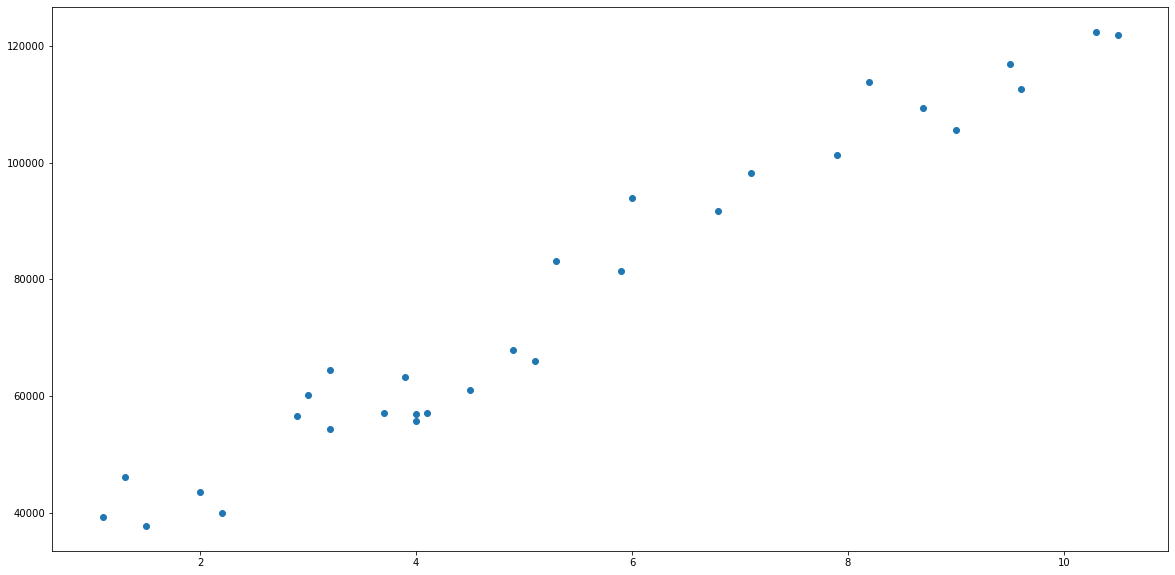

In [590]:
years = data['YearsExperience']
salary = data['Salary']
plt.plot(years, salary, 'o')

In [591]:
def f(x):
    res = 0
    for i in range(30):
        res += (x[0] * years[i] + x[1] - salary[i]) ** 2
    return res

In [592]:
def partial(f, i, x):
    h = 1e-3
    x[i] = x[i] + h
    right = f(x)
    x[i] = x[i] - 2 * h
    left = f(x)
    x[i] = x[i] + h
    return (right - left) / (2 * h)


def grad(f, x):
    return [partial(f, i, x) for i in range(len(x))]

In [593]:
def const_lr(n, start):
    return start

def exp_lr(n, start):
    k = 0.01
    return start * np.exp(-k * n)

def GB(f, lr, start, lr_strategy=const_lr, epoch=20):
    x = start
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr_strategy(i, lr) * np.array(grad(f, x))
        points[i] = x

    return points

In [594]:
res = GB(f, 0.0001, start=[1, 1], epoch=1000)[-1]
points = GB(f, 0.0001, start=[1, 1], epoch=1000)

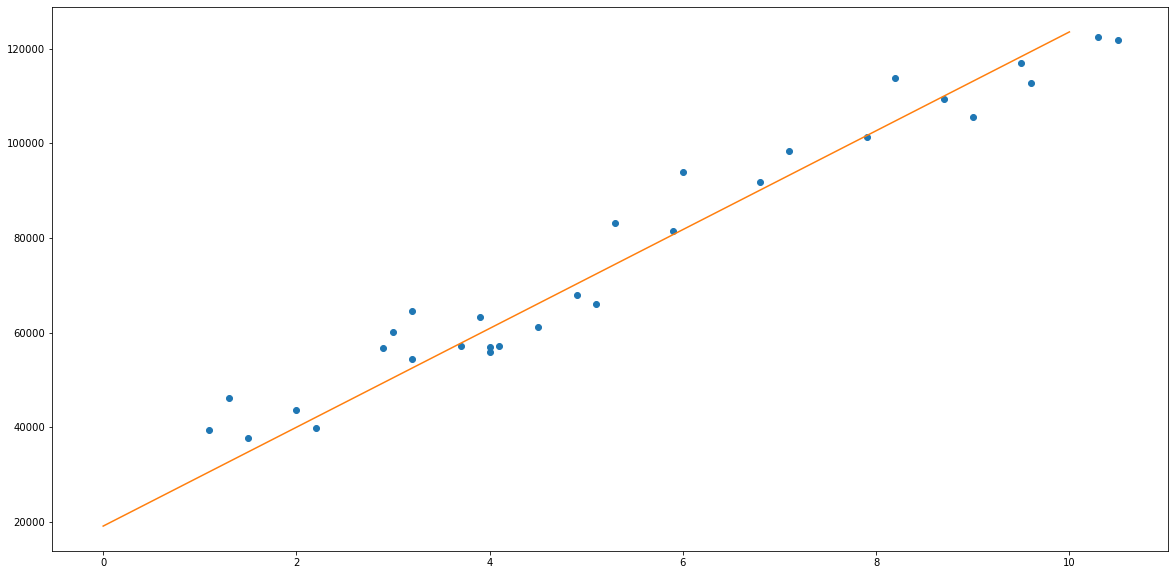

In [595]:
x = np.linspace(0, 10, 100)
plt.plot(years, salary, 'o')
plt.plot(x, res[0] * x + res[1])

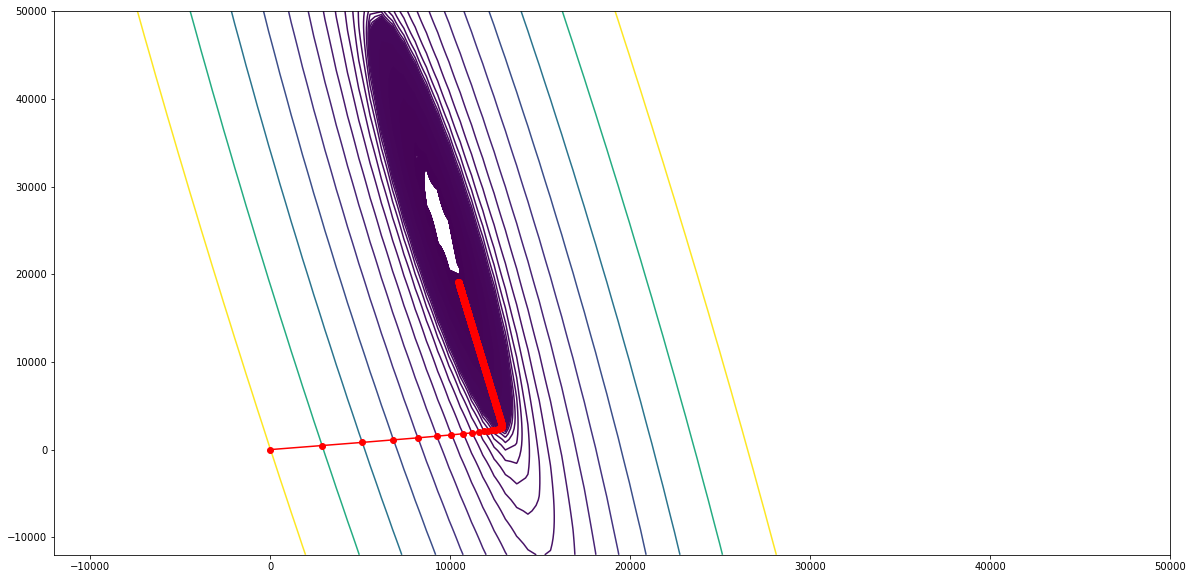

In [596]:
plt.rcParams["figure.figsize"] = (20, 10)
t = np.linspace(-12000, 50000, 100)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points] + list(np.linspace(-1, 1, 100))))
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')


In [597]:
res

array([10445.77182792, 19081.70423833])

In [609]:
import random


def partial(f, i, x, ii):
    h = 1e-3
    x[i] = x[i] + h
    right = f(x, ii)
    x[i] = x[i] - 2 * h
    left = f(x, ii)
    x[i] = x[i] + h
    return (right - left) / (2 * h)


def grad(f, x, ii):
    return [partial(f, i, x, ii) for i in range(len(x))]


def pp(x, i):
    return (x[0] * years[i] + x[1] - salary[i]) ** 2


def stoch_grad(x):
    i = random.randint(0, 29)
    return grad(pp, x, i)


def stoch_GB(f, lr, start, lr_strategy=exp_lr, epoch=20):
    x = start
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr_strategy(i, lr) * np.array(stoch_grad(x))
        points[i] = x

    return points

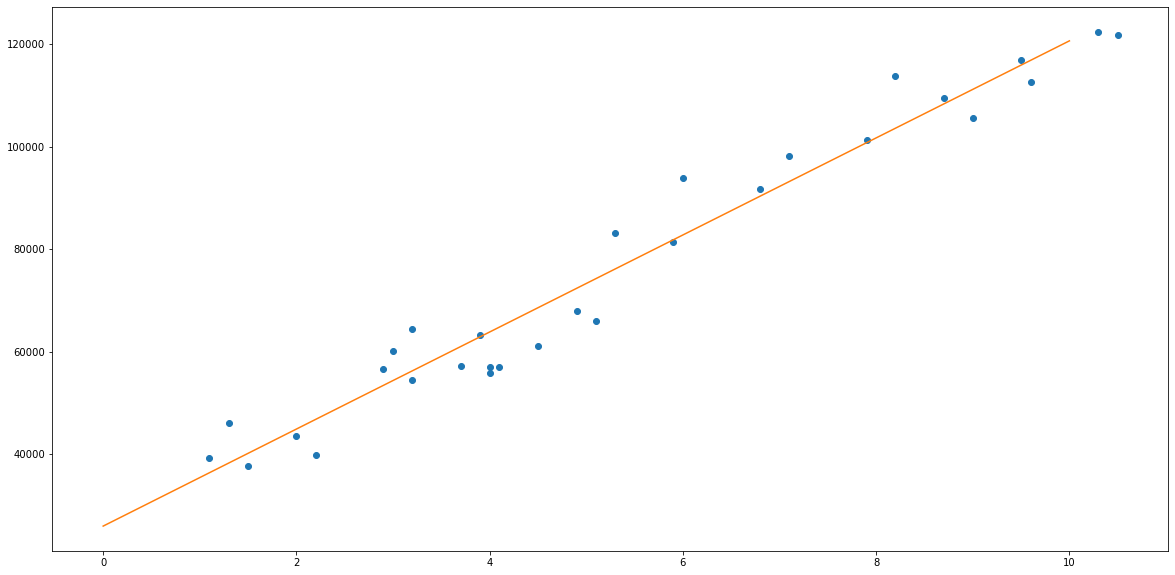

In [614]:
hui = stoch_GB(f, 0.025, start=[1, 1], epoch=1000)[-1]
points = stoch_GB(f, 0.025, start=[1, 1], epoch=1000)

x = np.linspace(0, 10, 100)
plt.plot(years, salary, 'o')
plt.plot(x, hui[0] * x + hui[1])

In [615]:
hui

array([ 9463.14670934, 26015.89160328])

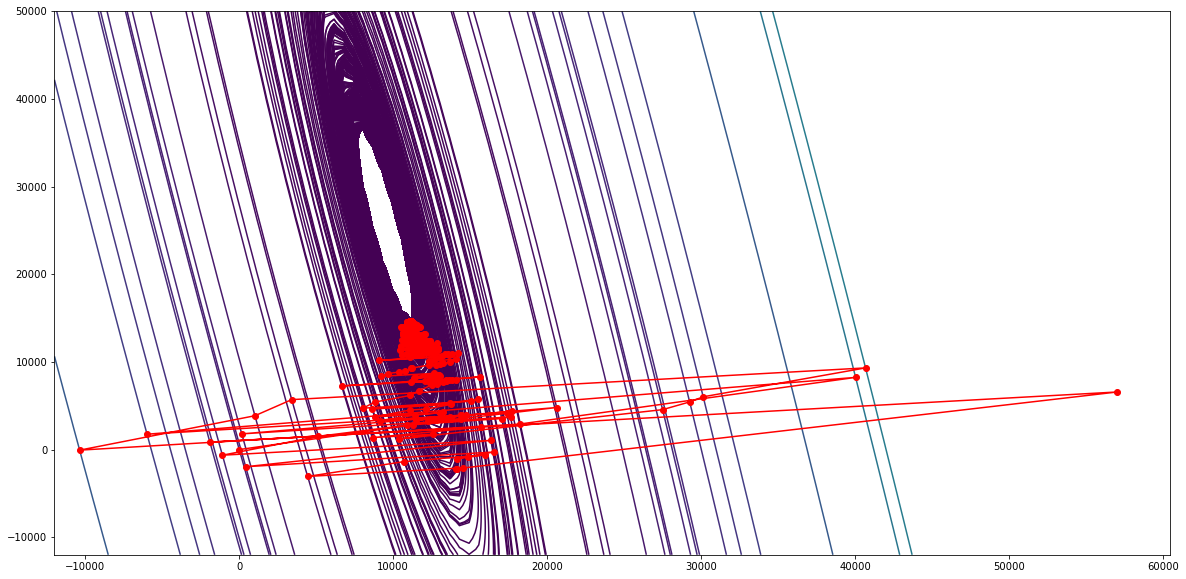

In [616]:
t = np.linspace(-12000, 50000, 100)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points] + list(np.linspace(-1, 1, 100))))
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')

In [602]:
import random


def partial(f, i, x, idxs):
    h = 1e-3
    x[i] = x[i] + h
    right = f(x, idxs)
    x[i] = x[i] - 2 * h
    left = f(x, idxs)
    x[i] = x[i] + h

    return (right - left) / (2 * h)


def grad(f, x, idxs):
    return [partial(f, i, x, idxs) for i in range(len(x))]


def pp2(x, idxs):
    sum = 0
    for i in idxs:
        sum += (x[0] * years[i] + x[1] - salary[i]) ** 2
    return sum


def minibatch_grad(x, batch):
    idxs = [random.randint(0, 29) for p in range(0, batch)]
    return grad(pp2, x, idxs)


def minibatch_GB(f, lr, start, lr_strategy=exp_lr, epoch=20, batch=1):
    x = start
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr_strategy(i, lr) * np.array(minibatch_grad(x, batch))
        points[i] = x

    return points

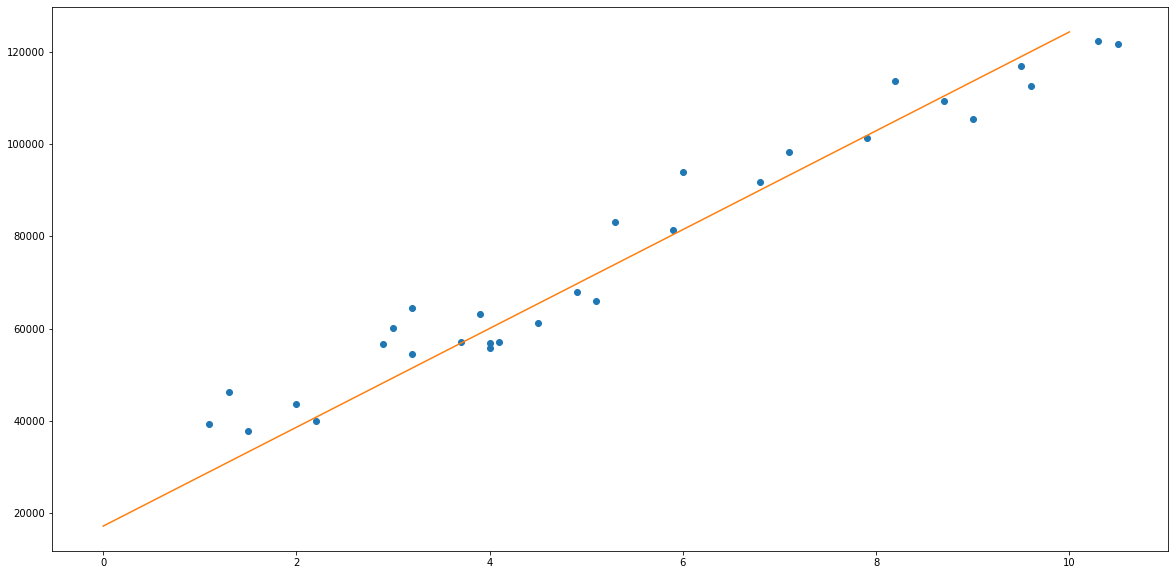

In [621]:
hui = minibatch_GB(f, 0.005, start=[1, 1], epoch=1000, batch=5)[-1]
points = minibatch_GB(f, 0.005, start=[1, 1], epoch=1000, batch=5)

x = np.linspace(0, 10, 100)
plt.plot(years, salary, 'o')
plt.plot(x, hui[0] * x + hui[1])

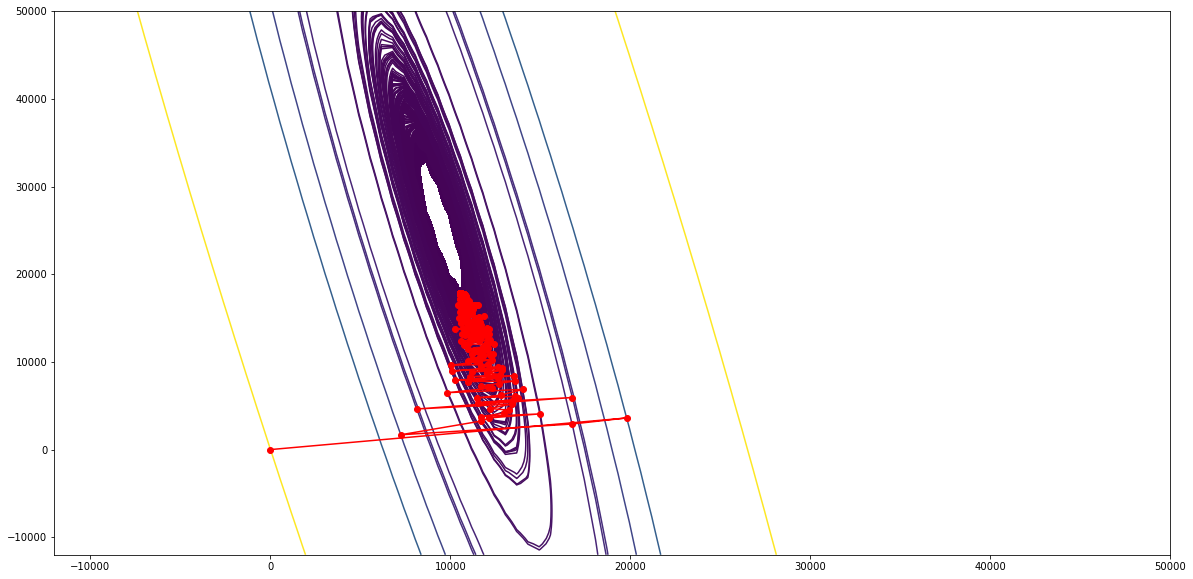

In [622]:
t = np.linspace(-12000, 50000, 100)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points] + list(np.linspace(-1, 1, 100))))
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')